# Line chart with styles

In [1]:
import pandas as pd
import sqlite3

#### analyze only the users and not the admins
#### analyze only the dates when there were both views and checker commits
#### use size of the font should be 8
#### the size of the figure is (15,8)
#### at the end of your Jupyter Notebook create a markdown cell and insert the question: “How many times was the number of views larger than 150?” Insert: “The answer is ___”. Put the number in the text instead of the underline.

In [2]:
conn = sqlite3.connect("../../data/checking-logs.sqlite")

In [18]:
commits = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", conn, parse_dates="timestamp", index_col="timestamp")
views = pd.io.sql.read_sql("SELECT datetime FROM pageviews WHERE uid LIKE 'user_%'", conn, parse_dates="datetime", index_col="datetime")

In [19]:
commits_count = commits.groupby(lambda x: x.date()).size()
views_count = views.groupby(lambda x: x.date()).size()

In [41]:
sum = pd.concat([views_count, commits_count], axis=1, join = "inner")
sum.rename(columns={0: "views", 1: "commits"}, inplace=True)

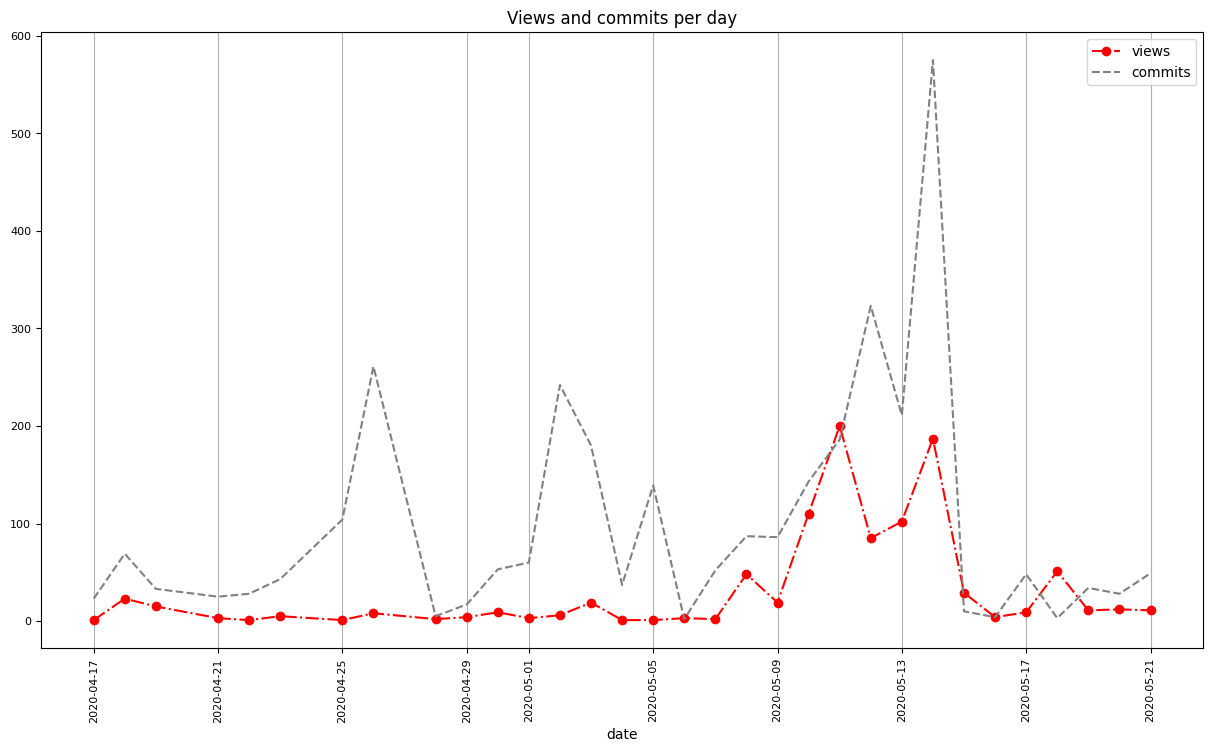

In [78]:
plot = sum.plot(
    figsize=(15, 8),
    fontsize=8,
    rot = 90,
    title = "Views and commits per day",
    xlabel="date",
    color = ["red", "grey"],
    style = ["o-.", "--"]
)
plot.xaxis.grid("True")


In [81]:
conn.close()

How many times was the number of views larger than 150
The answer is 2